### Chosen Dataset

I have chosen to work on a Meat Quality Assesment Dataset.

[https://www.kaggle.com/datasets/crowww/meat-quality-assessment-based-on-deep-learning/data]

### Importing necessary packages + Mounting Google Drive

In [ ]:
import os
import shutil
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
from matplotlib.ticker import MaxNLocator
from sklearn.metrics import confusion_matrix, classification_report

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Unzipping dataset

In [ ]:
destinationFolder = '/content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset'
filename = '/content/drive/MyDrive/Colab Notebooks/DLOR/Project/Meat Quality Dataset.zip'

In [ ]:
!unzip "$filename" -d "$destinationFolder"

Archive:  /content/drive/MyDrive/Colab Notebooks/DLOR/Project/Meat Quality Dataset.zip
  inflating: /content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/Fresh/test_20171016_104321D.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/Fresh/test_20171016_104521D.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/Fresh/test_20171016_104721D.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/Fresh/test_20171016_104921D.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/Fresh/test_20171016_105121D.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/Fresh/test_20171016_105321D.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/Fresh/test_20171016_105521D.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/Fresh/test_20171016_105721D.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/DLOR/

### Check Class Distribution

<BarContainer object of 2 artists>

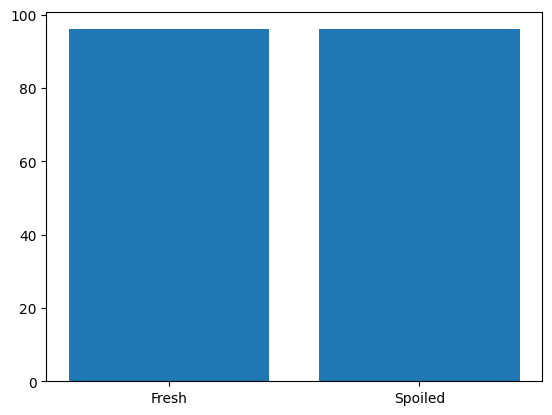

In [ ]:
plt.bar(class_counts.keys(), class_counts.values())

Both classes are balanced.

### Splitting into Training, Validation and Testing sets

In [ ]:
def create_folder(path):  # Create folder(s) if it doesn't exist
    try:
        os.mkdir(path)
    except FileExistsError:
        print("The folder already exists:", path)
    else:
        print("The folder is created:", path)

In [ ]:
# The path where the original dataset is stored, organized by class.
source_folder = '/content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset'

# Define the folder paths for the dataset splits
training_folder = '/content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/training_set'
validation_folder = '/content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/validation_set'
testing_folder = '/content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/testing_set'

# Create the folders for dataset splits
create_folder(training_folder)
create_folder(validation_folder)
create_folder(testing_folder)

# Define the class labels
classes = ['Fresh', 'Spoiled']

# Create subfolders for each class within each dataset split
for folder in [training_folder, validation_folder, testing_folder]:
    create_folder(folder)
    for class_name in classes:
        create_folder(os.path.join(folder, class_name))

# Function to split and copy images into training, validation, and testing sets
def split_and_copy(src_dir, train_dir, val_dir, test_dir, train_size=0.7, val_size=0.2):
    images = os.listdir(src_dir)
    train_imgs, temp_imgs = train_test_split(images, test_size=(1 - train_size), random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=(1 - val_size / (1 - train_size)), random_state=42)

    # Copy images to respective folders
    for img in train_imgs:
        shutil.copy(os.path.join(src_dir, img), os.path.join(train_dir, img))
    for img in val_imgs:
        shutil.copy(os.path.join(src_dir, img), os.path.join(val_dir, img))
    for img in test_imgs:
        shutil.copy(os.path.join(src_dir, img), os.path.join(test_dir, img))

The folder is created: /content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/training_set
The folder is created: /content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/validation_set
The folder is created: /content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/testing_set
The folder already exists: /content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/training_set
The folder is created: /content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/training_set/Fresh
The folder is created: /content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/training_set/Spoiled
The folder already exists: /content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/validation_set
The folder is created: /content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/validation_set/Fresh
The folder is created: /content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/validation_set/Spoiled
The folder already exists: /content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/testin

In [ ]:
# Loop through each class to split and copy images
for class_name in classes:
    src_dir = os.path.join(source_folder, class_name)
    train_dir = os.path.join(training_folder, class_name)
    val_dir = os.path.join(validation_folder, class_name)
    test_dir = os.path.join(testing_folder, class_name)

    split_and_copy(src_dir, train_dir, val_dir, test_dir)

In [ ]:
# Verify the image counts in each folder
for folder in [training_folder, validation_folder, testing_folder]:
    for class_name in classes:
        path = os.path.join(folder, class_name)
        print(f"{path}: {len(os.listdir(path))} images")

/content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/training_set/Fresh: 663 images
/content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/training_set/Spoiled: 663 images
/content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/validation_set/Fresh: 189 images
/content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/validation_set/Spoiled: 189 images
/content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/testing_set/Fresh: 96 images
/content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/testing_set/Spoiled: 96 images


### Check Class Distribution across the 3 different sets

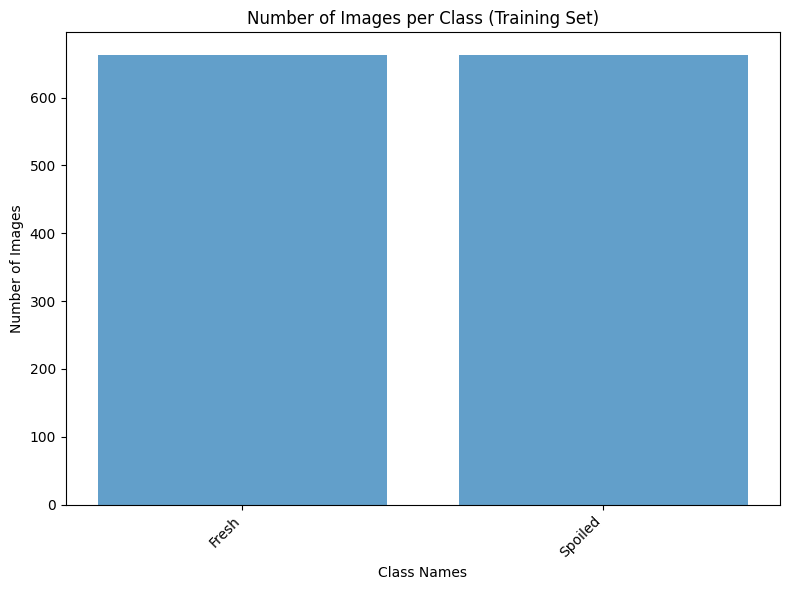

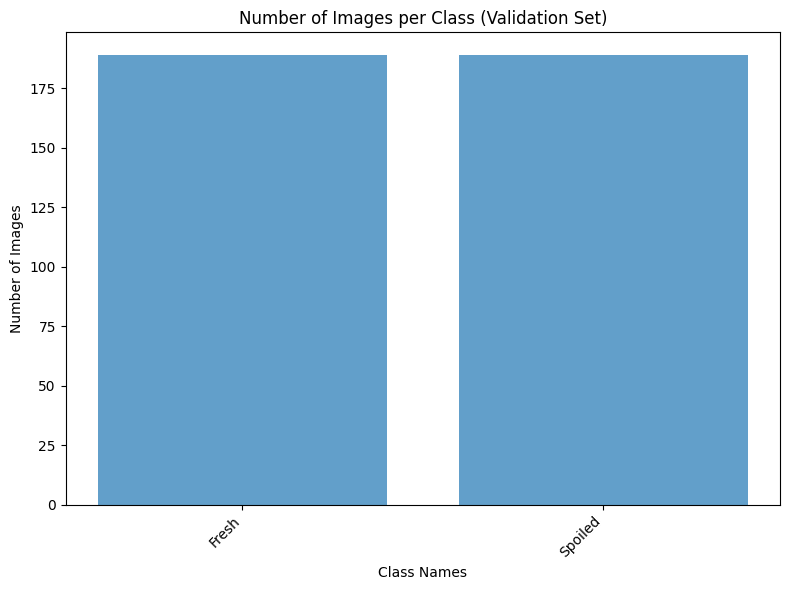

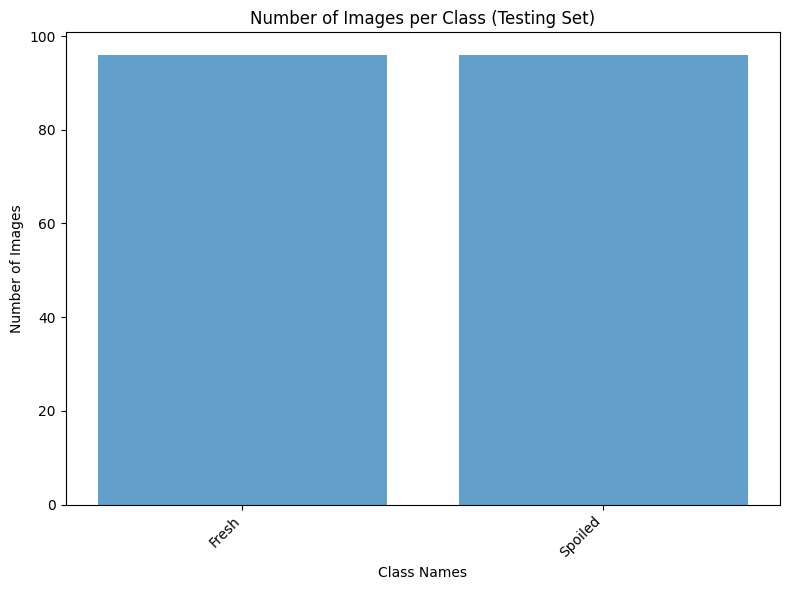

In [ ]:
# Define subsets and their paths
subsets = {
    "Training Set": os.path.join(destinationFolder, "training_set"),
    "Validation Set": os.path.join(destinationFolder, "validation_set"),
    "Testing Set": os.path.join(destinationFolder, "testing_set"),
}

# Iterate through each subset and count images for each class
for subset_name, subset_path in subsets.items():
    class_counts = {}

    # Count files in each class subfolder
    for class_name in os.listdir(subset_path):
        class_path = os.path.join(subset_path, class_name)
        if os.path.isdir(class_path):
            file_count = len(os.listdir(class_path))  # Count files in the class subfolder
            class_counts[class_name] = file_count

    # Plot the class distribution for the current subset
    plt.figure(figsize=(8, 6))
    bars = plt.bar(class_counts.keys(), class_counts.values(), alpha=0.7)
    plt.title(f"Number of Images per Class ({subset_name})")
    plt.xlabel("Class Names")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

The 2 classes are balanced across all 3 datasets.

### Analyze image and dimensions

Fresh Meat - Train:


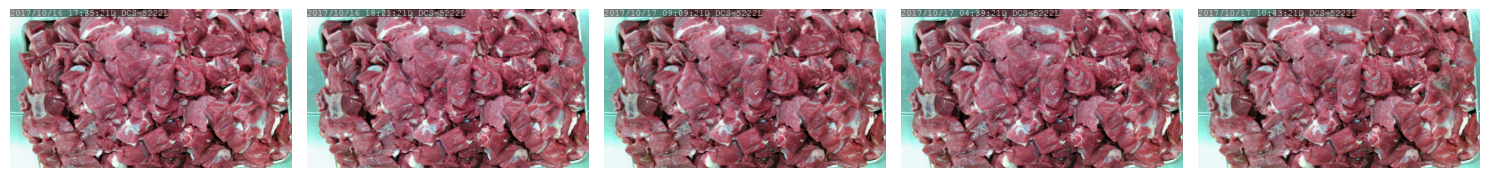

Image: test_20171016_173521D.jpg, Shape: (720, 1280, 3)
Image: test_20171016_182121D.jpg, Shape: (720, 1280, 3)
Image: test_20171017_090921D.jpg, Shape: (720, 1280, 3)
Image: test_20171017_043921D.jpg, Shape: (720, 1280, 3)
Image: test_20171017_104321D.jpg, Shape: (720, 1280, 3)
Spoiled Meat - Train:


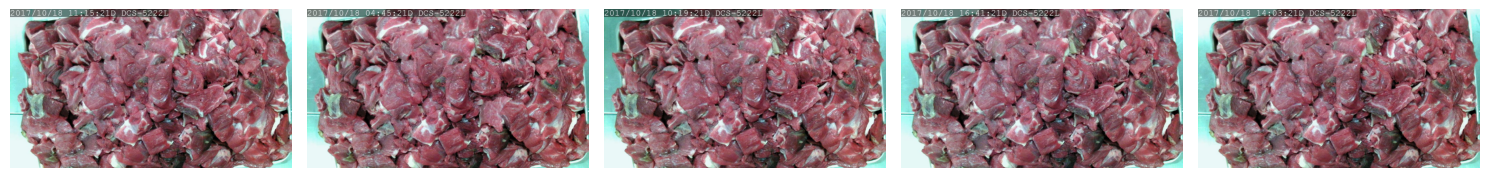

Image: test_20171018_111521D.jpg, Shape: (720, 1280, 3)
Image: test_20171018_044521D.jpg, Shape: (720, 1280, 3)
Image: test_20171018_101921D.jpg, Shape: (720, 1280, 3)
Image: test_20171018_164121D.jpg, Shape: (720, 1280, 3)
Image: test_20171018_140321D.jpg, Shape: (720, 1280, 3)


In [ ]:
# Function to visualize images and check for dimensions
def visualize_images_in_row(folder_path, num_images=5):
    images = random.sample(os.listdir(folder_path), num_images)  # Randomly select images

    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(folder_path, img_name)

        sample_image = load_img(img_path)

        # Display the image in a subplot
        plt.subplot(1, num_images, i + 1)
        plt.imshow(sample_image)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Check and print dimensions of the displayed images
    for img_name in images:
        img_path = os.path.join(folder_path, img_name)
        sample_image = load_img(img_path)
        img_array = img_to_array(sample_image)     # Convert the image to a NumPy array
        print(f"Image: {img_name}, Shape: {img_array.shape}")

# Visualize and check dimensions for 'Fresh' class images in the training set
print("Fresh Meat - Train:")
visualize_images_in_row('/content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/training_set/Fresh')

# Visualize and check dimensions for 'Spoiled' class images in the training set
print("Spoiled Meat - Train:")
visualize_images_in_row('/content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/training_set/Spoiled')

All images in the dataset have standardised dimensions of (720, 1280, 3).

### Data Augmentation


In [ ]:
# Create a data generator for training with augmentation
datagen_train = ImageDataGenerator(
    rescale=1./255,               # Normalize pixel values to the range [0, 1]
    rotation_range=10,            # Randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,        # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,       # Randomly shift images vertically (fraction of total height)
    zoom_range=0.1,               # Randomly zoom in/out image
    horizontal_flip=True,         # Randomly flip images horizontally
    brightness_range=[0.8, 1.2],  # Randomly adjust brightness
)

# No augmentation need for validation and test data; only normalize them
datagen_valid = ImageDataGenerator(rescale=1./255)
datagen_test = ImageDataGenerator(rescale=1./255)

In [ ]:
# Directory paths for train, validation, and test sets
train_path = '/content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/training_set'
validation_path = '/content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/validation_set'
test_path = '/content/drive/MyDrive/Colab Notebooks/DLOR/Project/Dataset/testing_set'

# Prevent loading issues with truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Create generators for train, validation, and test sets
train_generator = datagen_train.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
)

validation_generator = datagen_valid.flow_from_directory(
    validation_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
)

test_generator = datagen_test.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
)

Found 1326 images belonging to 2 classes.
Found 378 images belonging to 2 classes.
Found 192 images belonging to 2 classes.


### Visualize examples images after Data Augmentation

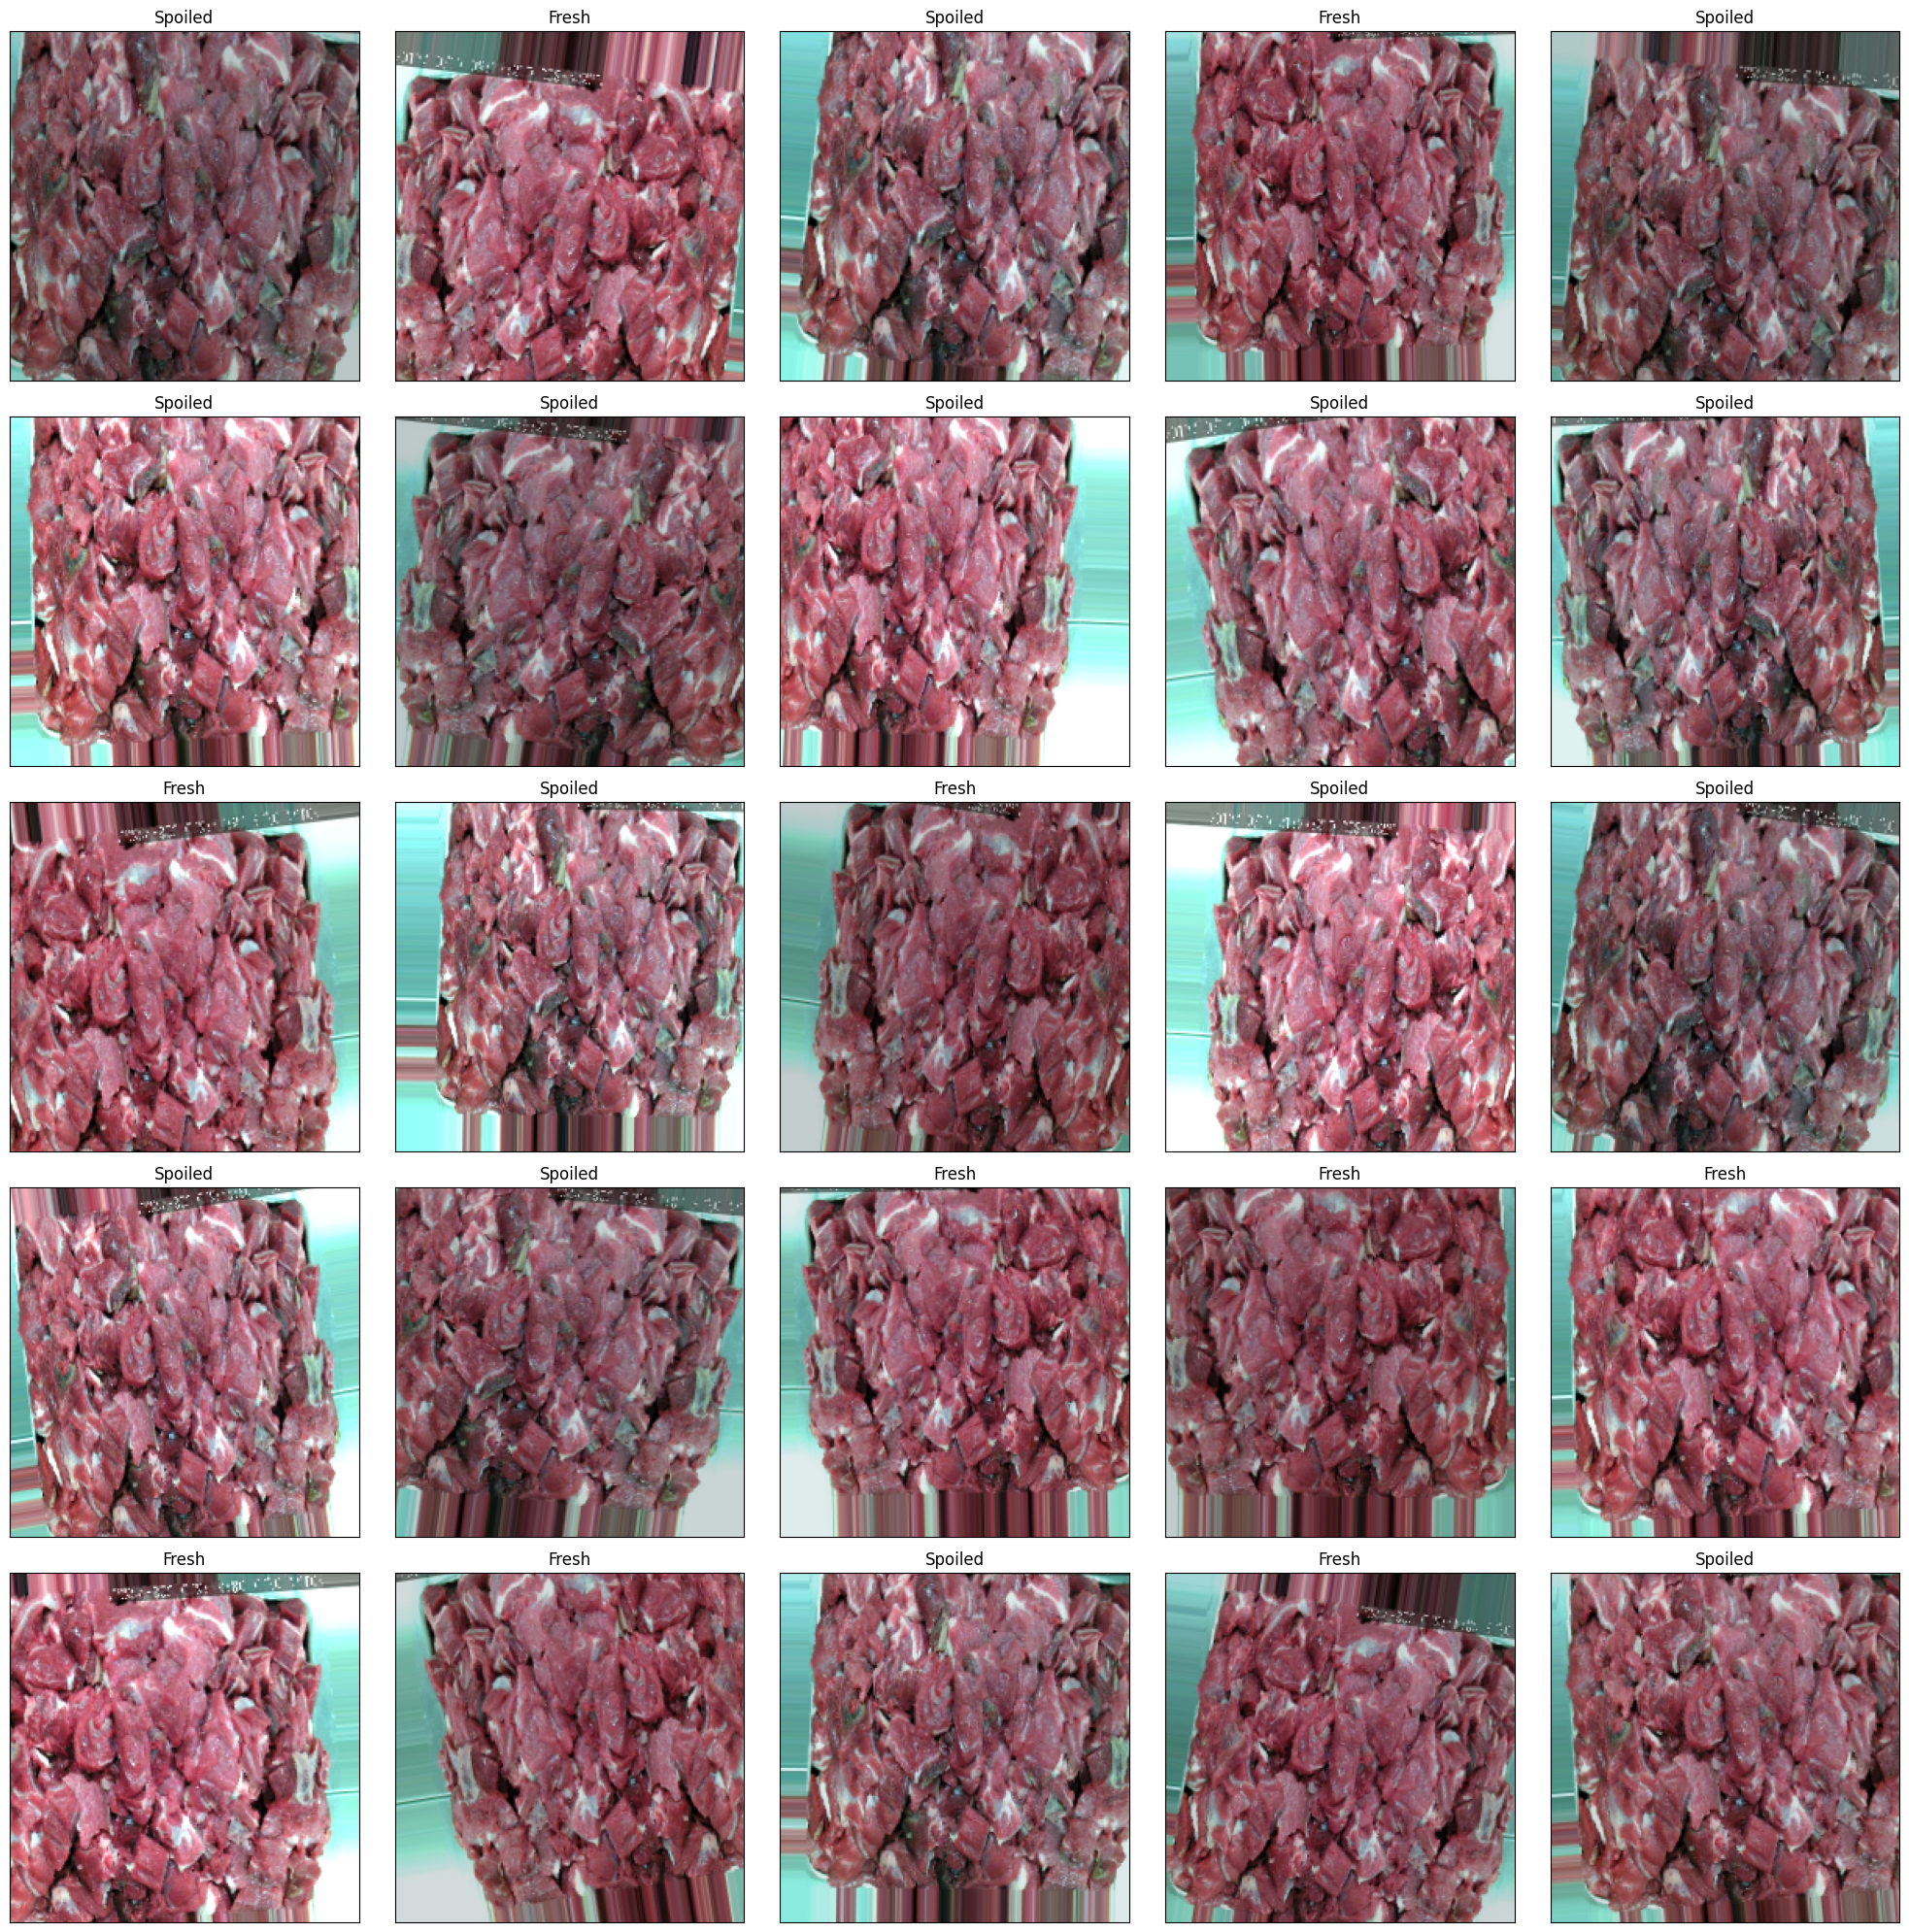

In [ ]:
# Get class names from the train generator
classes_dict = dict(train_generator.class_indices)

# Reverse the dictionary to map numerical labels back to class names
classes_dict = {v: k for k, v in classes_dict.items()}

# Fetch a batch of images and labels from the train generator
images, labels = next(train_generator)

# Plot the images along with their class names
plt.figure(figsize=(20, 20))
for i in range(25):  # Plot first 25 images in the batch
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])
    plt.xticks([])
    plt.yticks([])

    # Decode the label from one-hot encoding to class name
    class_idx = labels[i].argmax()  # Find the index of the class with the highest probability
    class_name = classes_dict[class_idx]  # Map index to the corresponding class name
    plt.title(class_name)

plt.tight_layout()
plt.show()

### Creating CNN Model (LeNet-5)

In [ ]:
# Images are resized to 224x224 with 3 color channels (RGB)
input_shape = (224, 224, 3)

# Initialize the Sequential model
model = tf.keras.Sequential()

# First CONV => RELU => POOL
model.add(tf.keras.layers.Conv2D(6, kernel_size=(5, 5),
    strides=(1, 1),
    padding='same',
    input_shape=input_shape,
    kernel_regularizer=tf.keras.regularizers.l2(0.01),  # L2 Regularization
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros'
))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Second CONV => RELU => POOL
model.add(tf.keras.layers.Conv2D(16, kernel_size=(5, 5),
    padding='valid',
    kernel_regularizer=tf.keras.regularizers.l2(0.01)  # L2 Regularization
))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Third CONV => RELU
model.add(tf.keras.layers.Conv2D(120, kernel_size=(5, 5),
    padding='valid',
    kernel_regularizer=tf.keras.regularizers.l2(0.01)  # L2 Regularization
))
model.add(tf.keras.layers.Activation('relu'))

# Flatten the feature maps
model.add(tf.keras.layers.Flatten())

# Fully Connected Layer
model.add(tf.keras.layers.Dense(84,
    kernel_regularizer=tf.keras.regularizers.l2(0.01)  # L2 Regularization
))
model.add(tf.keras.layers.Dropout(0.5))  # Dropout Layer

# Output Layer for Categorical Classification
model.add(tf.keras.layers.Dense(2, activation='softmax',
    kernel_regularizer=tf.keras.regularizers.l2(0.01)  # L2 Regularization
))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 224, 224, 6)         │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 224, 224, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 112, 112, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 108, 108, 16)        │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 108, 108, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 54, 54, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 50, 50, 120)         │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 50, 50, 120)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 300000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 84)                  │      25,200,084 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 84)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,251,246 (96.33 MB)

 Trainable params: 25,251,246 (96.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the model
model_log = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=int(train_generator.samples / train_generator.batch_size),
    validation_steps=int(validation_generator.samples / validation_generator.batch_size),
    epochs=20
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 155s 4s/step - accuracy: 0.5267 - loss: 7.8234 - val_accuracy: 0.5000 - val_loss: 1.5023
Epoch 2/20
 1/41 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.4286 - loss: 1.5315

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4286 - loss: 1.5315 - val_accuracy: 0.5000 - val_loss: 1.4599
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.6109 - loss: 1.2863 - val_accuracy: 0.6903 - val_loss: 0.9522
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7500 - loss: 0.8595 - val_accuracy: 0.4615 - val_loss: 1.3657
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 196s 4s/step - accuracy: 0.8122 - loss: 0.9203 - val_accuracy: 0.9261 - val_loss: 0.6503
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8750 - loss: 0.6725 - val_accuracy: 0.9615 - val_loss: 0.6496
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 154s 4s/step - accuracy: 0.8719 - loss: 0.6938 - val_accuracy: 0.9261 - val_loss: 0.6607
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9062 - loss: 0.7262 - val_accuracy: 0.8846 - val_loss: 0.6717
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - accuracy: 0.9239 - loss: 0.6241 - val_accuracy: 0.9034 - val_loss: 0.

### Model Evaluation

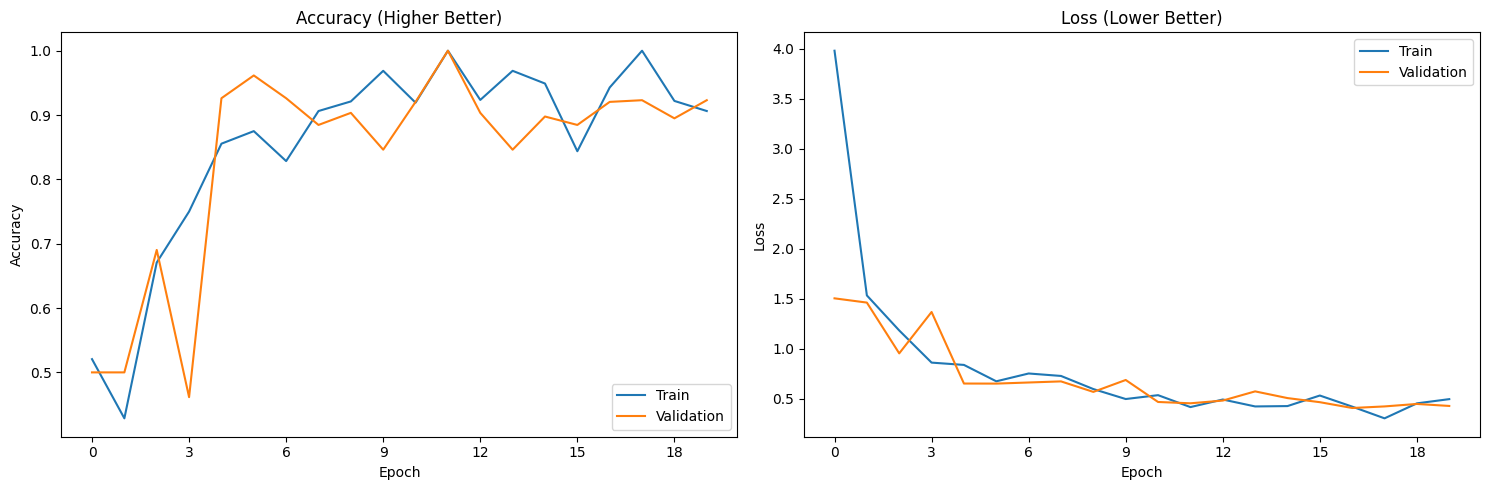

In [ ]:
# Plot training and validation metrics
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy Plot
ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['Train', 'Validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

# Loss Plot
ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['Train', 'Validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

**Accuracy Chart (Left)**

Observation:
- The training and validation accuracy increase rapidly during the first few epochs.
- The training accuracy remains slightly higher than validation accuracy throughout the whole training.
---
Analysis:
- The gap between training and validation accuracy is minimal, indicating low overfitting.

**Loss Chart (Right)**

Observation:
- Both training and validation loss decrease rapidly in the initial epochs, this shows the significant improvement in the model learning.
---
Analysis:
- The close gap between training and validation loss curves suggests the model generalizes well to unseen data.
- Validation loss is slightly higher than training loss, this implies the model isn’t overfitting excessively.

In [ ]:
# Evaluate on validation set
val_loss, val_acc = model.evaluate(validation_generator, steps=int(validation_generator.samples / validation_generator.batch_size))
print(f"Validation Accuracy: {val_acc:.4f} \nValidation Loss: {val_loss:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 896ms/step - accuracy: 0.8316 - loss: 0.6454
Validation Accuracy: 0.8409 
Validation Loss: 0.6339


In [ ]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator, steps=int(test_generator.samples / test_generator.batch_size))
print(f"Test Accuracy: {test_acc:.4f} \nTest Loss: {test_loss:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8644 - loss: 0.5505
Test Accuracy: 0.8750 
Test Loss: 0.5263


6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step


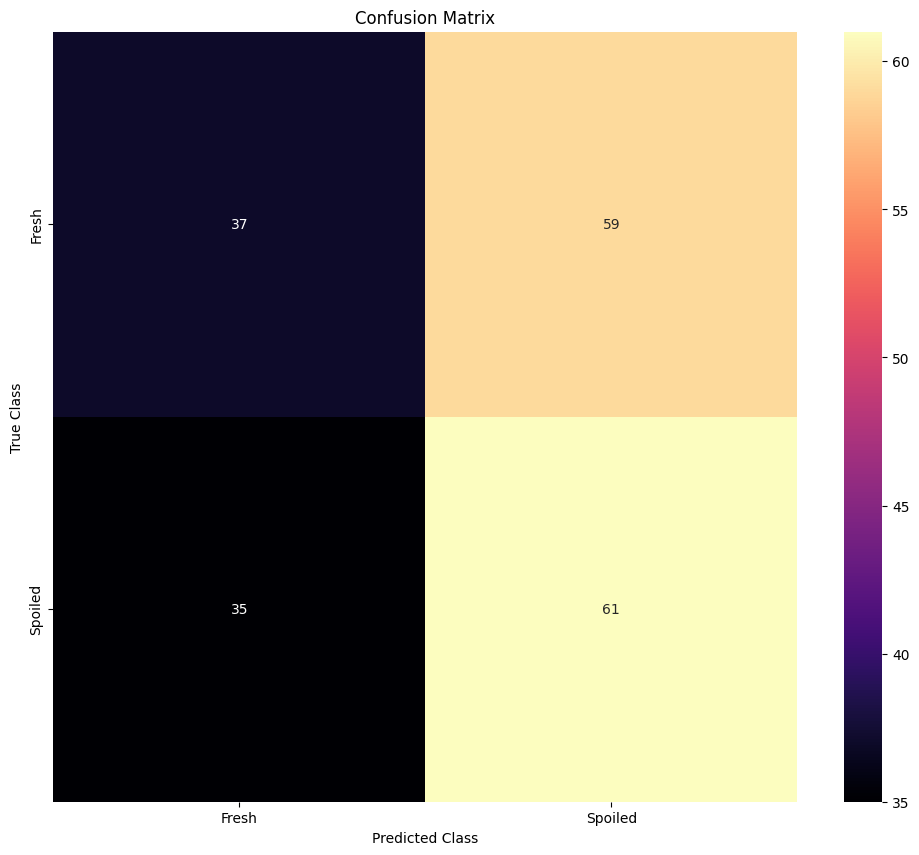

In [ ]:
# Get class names from the data generator
class_names = list(validation_generator.class_indices.keys())

# True labels from the test generator
true_labels = test_generator.classes

# Model predictions for the test data
pred_probs = model.predict(test_generator, steps=int(test_generator.samples / test_generator.batch_size))
pred_labels = np.argmax(pred_probs, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot Confusion Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="magma", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

**Observations from the Matrix**

The model correctly classified:
- 37 "Fresh" samples as "Fresh."
- 61 "Spoiled" samples as "Spoiled."
---
The model misclassified:
- 59 "Fresh" samples as "Spoiled" (False Positives for "Spoiled").
- 35 "Spoiled" samples as "Fresh" (False Negatives for "Spoiled").

In [ ]:
# Classification Report
print("\nClassification Report:\n")
print(classification_report(true_labels, pred_labels, target_names=class_names))


Classification Report:

              precision    recall  f1-score   support

       Fresh       0.51      0.39      0.44        96
     Spoiled       0.51      0.64      0.56        96

    accuracy                           0.51       192
   macro avg       0.51      0.51      0.50       192
weighted avg       0.51      0.51      0.50       192



### Plans for Improvement

**Overall**

Although the model achieved an overall test accuracy of 87.5%, the confusion matrix and classification report revealed that it struggles with the "Fresh" class. The model attained only 39% recall and an F1-score of 0.44 for "Fresh," indicating that many "Fresh" samples were misclassified as "Spoiled." While the model performed slightly better on the "Spoiled" class, achieving 64% recall and an F1-score of 0.56, its precision for "Spoiled" was low at 51%, suggesting a high rate of false positives.

---
**Suggested Improvement**

In part 2, I plan on improving my model performance by doing:
1. Hyperparameter Tuning:
- Explore and fine-tune learning rates to find the optimal setting for better convergence.
- Adjust batch sizes to evaluate their impact on model generalization.

2. Regularization:
- Experiment with varying dropout rates and L2 regularization values to solve the issue of overfitting.

3. Transfer Learning with Pre-Trained Models:
- Use pre-trained models as it will be able to extract more complex features such as edges, textures, and shapes. These features are particularly critical for meat quality analysis task, where subtle details like texture, marbling, and patterns play a significant role in the classification.

---

**Conclusion**

The current baseline model, LeNet-5, due to its limited architecture, lacks the capacity to learn these complex features effectively. Its simplicity resulted in failure to capture the finer details necessary to classify between "Fresh" and "Spoiled" meat accurately.
